# COM2004/3004 Assignment 2: Code Snippets

v1.0 30/10/2016

This notebook contains some Python code snippets that you may find useful when working on COM2004/COM3004 assignment 2.


## 1. Loading the data

The cell below shows you how to load the data from the pickle file.

In [1]:
import pickle
data = pickle.load(open("assignment2.pkl", "rb"))
train_data = data['train_data']
train_labels = data['train_labels']
test1 = data['test1']
test2 = data['test2']
words  = data['words']

## 2. Displaying a character

The cell below displays a sample of the character data as an image.

(699, 900)


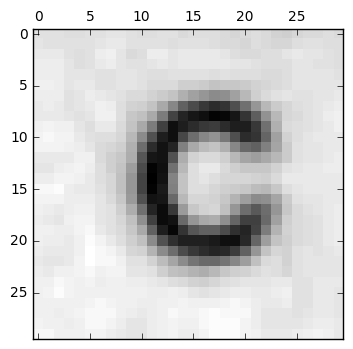

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

n = 18 # Select the 18th sample
pixels = train_data[n, :]
plt.matshow(np.reshape(pixels, (30, 30), order='F'), cmap=cm.gray)
print (train_data.shape)

## 3. The $k$-Nearest Neighbour Classifier

The cell below contains the $k$-NN classifier function that is being used in the lab classes.

In [3]:
def classify(train, train_labels, test):
    """Nearest neighbour classification

    train - matrix of training data (one sample per row)
    train_labels - corresponding training data labels
    test - matrix of samples to classify

    returns: labels - vector of test data labels
    """
    x = np.dot(test, train.transpose())
    modtest = np.sqrt(np.sum(test*test, axis=1))
    modtrain = np.sqrt(np.sum(train*train, axis=1))
    dist = x / np.outer(modtest, modtrain.transpose())  # cosine distance
    nearest = np.argmax(dist, axis=1)
    labels = train_labels[nearest]
    return labels


# 4. Using the classifier

The code below shows an example of using the classifier. 

(For demonstration purposes the training data has been cut into smaller training and test sets. In the assignment you will use all the training data for training and will be testing on test samples extracted from the images.)

In [4]:
import numpy as np

# Use first 599 samples of train_data for training
train1_data = train_data[0:599, :]
train1_labels = train_labels[0:599]

# Use last 100 samples of train_data for testing
test1_data = train_data[599:, :]
test1_labels = train_labels[599:]

# Count how many samples in the test set
n_test = test1_labels.shape[0]

# Classify the test set to get an array of guessed labels
test1_guessed = classify(train1_data, train1_labels, test1_data)

# Compare guesses against true labels and compute percent correct
pcor = np.sum(test1_guessed == test1_labels) * 100.0 / n_test

print(pcor)  # This should give 92% correct

92.0


# Pre-Processing

In [5]:
import types
GRID_LENGTH=15
BLOCK_LENGTH=30
TEST_LABELS = np.array([14,18,25, 5,12, 7,14, 1,12,14,12, 5,16, 2,18,
						21,14,15,14, 6, 8, 2,18,15,16, 5,18,18,13,16,
						 3,15,14, 2,20, 8, 7, 9,18,23,25, 2,14, 1, 6,
						 1,20,23, 1, 9, 5, 5,23,15,18, 3, 1, 9,12,22,
						14,16,15, 6, 4,14, 5,15,23, 5,13,14,15, 1,10,
						 5, 5,18,11, 9,18,19, 1,20, 5,5 ,23,14, 5,16,
						12,18, 2,14, 5,19, 8,15, 7,23, 5, 2,12, 5, 1,
						12,15, 4, 5,18,19, 8, 4,14,18,18,12,16,14,24,
						25,20, 9,12, 4,18, 9,25, 4,21, 9, 8,25,15,20,
						11, 5,18,18, 5,18,16, 5, 7, 3,24,15,18,20,15,
						 5,16, 1,14, 2, 9,23, 8,15, 6,16, 1,18,19,14,
						10, 5, 5,14, 9,15, 6, 5, 8,14,18,18, 1,14,26,
						 2, 9, 4,14,14,15, 4,19, 5,11,15, 5, 2, 5,10,
						14, 2,18,20,18,19,12,14, 5, 1, 8, 1, 7, 8,14,
						 1,12, 5,21,20,14, 5,11,23,14, 9,12, 5,19,12])

CORRECT_LINES = [(192,132),(180, 68),(154, 42),( 92, 32),( 30, 75),( 55, 51),
				 (186,184),( 63,111),( 44,156),(131,191),(165, 90),( 74,172),
				 (217,214),(  8,  2),(219,107),( 29, 85),( 89,164),(151,106),
				 ( 91, 16),(  1,113),( 22, 26),(223,103),(59, 157),( 39, 34)]

def get_name(testN):
	return "test1" if np.ndarray.tolist(test1)==np.ndarray.tolist(testN) else "test2"
# Examples
print(get_name(test1))
print(get_name(test2))

test1
test2


[ 138.  139.  138.  139.  140.  141.  143.  144.  143.  142.  142.  142.
  140.  140.  141.  143.  142.  142.  142.  143.  145.  146.  146.  146.
  145.  146.  145.  143.  143.  145.  138.  139.  139.  139.  139.  139.
  141.  143.  142.  142.  141.  141.  141.  139.  140.  141.  141.  141.
  142.  143.  145.  146.  145.  144.  143.  146.  145.  143.  142.  144.
  139.  139.  139.  138.  138.  139.  141.  141.  141.  140.  140.  141.
  140.  138.  139.  140.  141.  141.  142.  143.  145.  147.  146.  144.
  143.  146.  145.  143.  142.  143.  138.  138.  139.  138.  138.  139.
  140.  141.  141.  140.  140.  141.  140.  139.  140.  141.  141.  141.
  141.  143.  145.  146.  146.  145.  144.  146.  146.  143.  142.  142.
  137.  137.  139.  140.  138.  139.  140.  142.  142.  141.  141.  141.
  139.  140.  140.  141.  141.  140.  140.  141.  143.  144.  145.  146.
  145.  147.  147.  144.  141.  142.  137.  137.  138.  138.  137.  139.
  141.  142.  142.  141.  140.  140.  138.  139.  1

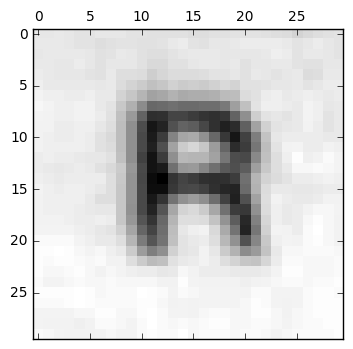

In [6]:
def get_characters(ndimarray, as_vectors):
	"""This allows the extraction of individual character images as 30 by 30 matrices
	   ndimarray: the matrix of pixels for every character
	   as_vectors: if this is true, a 225 by 900-element matrix is returned."""
	letters = []
	cols = (ndimarray.shape[1])
	rows = (ndimarray.shape[0])
	col_step = cols//GRID_LENGTH
	row_step = rows//GRID_LENGTH
	for current_row_start in range(0, rows, row_step):
		for slice_start in range(0,cols,col_step):
			letter = []
			for i in range(current_row_start,current_row_start+row_step):
				row_of_single_letter = ndimarray[i][slice_start:slice_start+col_step]
				letter+=[row_of_single_letter]
			letters+=[letter]
	if as_vectors:
		return np.array([np.reshape(np.transpose(feature_vector), (900,), order='C') for feature_vector in np.array(letters)])
	else:
		return np.array(letters)
# Examples
print(get_characters(test1,True)[1])
plt.matshow(get_characters(test1,False)[1], cmap=cm.gray)

# Classification

In [7]:
def correctly_processed(classified,actual,percentage):
	correct=0
	for i in range(0,classified.shape[0]):
		if (classified[i]==actual[i]):
			correct+=1
	return int(correct/(0.01*classified.shape[0] if percentage else 1))
# Example
classified_mat = classify(train_data, train_labels, get_characters(test1, True))
print(str(correctly_processed(classified_mat,TEST_LABELS,False))
	  + " letters were correctly labeled which is about "
	  + str(correctly_processed(classified_mat,TEST_LABELS,True)) + "% of the letters.")

224 letters were correctly labeled which is about 99% of the letters.


# Perform the search

In [8]:
def search(list_to_search,word,direction='A'):
	"""This returns a list of tuples. In each tuple, the first value is the index of where the word could begin, the second is the index of
	   where it could end, and the third is the number of characters that match the word to search with.
	   list_to_search: list of tuples. In each tuple, the first value is the original index of the label, the second is the label found
					   using classify.
	   word: word to search with
	   direction: direction to search in. It can be 'F' for forward, 'B' for back or 'A' for all."""
	if (len(word)>len(list_to_search)):
		return []
	unzipped=list(zip(*list_to_search))
	orig_indices=list(unzipped[0])
	if (direction=='F'): #Search forwards
		arr_to_search=np.array(unzipped[1])
		pos=0
		forward=[]
		while len(word)<=len(arr_to_search[pos:]):
			num_correct = sum(word==(arr_to_search[pos:pos+len(word)]))
			if num_correct==len(word): #If an exact match is found, return it immediately with (0,0,0) to signify an exact match
				return [(0,0,0),(orig_indices[pos],orig_indices[pos+len(word)-1],num_correct)]
			if num_correct>0: #Ignore totally incorrect tuples to increase sorting speed later on.
				forward+=[(orig_indices[pos],orig_indices[pos+len(word)-1],num_correct)]
			pos+=1
		return forward
	elif (direction=='B'): #Search backwards
		reversed_list=list(list_to_search)
		reversed_list.reverse()
		return search(reversed_list,word,'F')
	else: #Search in all directions and combine
		return search(list_to_search,word,'F') + search(list_to_search,word,'B')

# Display the result

In [9]:
def draw_line(graph, start, end, side_length):
	"""This draws a line on a pyplot between two letters.
	   graph: the pyplot to draw on
	   start_letter: where the line begins, can be a coordinate or index.
	   end_letter: where the line ends, can be a coordinate or index."""
	
	if (isinstance(start, int)):
		draw_line(graph, [start % GRID_LENGTH,start//GRID_LENGTH], [end % GRID_LENGTH,end//GRID_LENGTH], side_length)
	else:
		# get starting x-coordinate, get ending x-coordinate.
		xSxE=[start[0]*side_length+GRID_LENGTH,end[0]*side_length+GRID_LENGTH]
		# get starting y-coordinate, get ending y-coordinate.
		ySyE=[start[1]*side_length+GRID_LENGTH,end[1]*side_length+GRID_LENGTH]
		# Plot a yellow line on the graph
		plt.xlim(0, GRID_LENGTH*side_length)
		plt.ylim(GRID_LENGTH*side_length, 0)
		graph.plot(xSxE, ySyE, 'y-')

# Dimensionality Reduction
After passing the testing data through the get_characters function (thereby turning each ite into 900-element vectors just as the items in train_data are), it must be passed through a dimensionality reduction function. train data, which alsoconsistss of 900-element vectors, must be passed through the same function.

In [27]:
from scipy import linalg
def reduce(test_dat,train_dat,n,pca_indices=range):
	"""   test_data: Testing data to reduce
		 train_data: Training data to use
				  n: The number of features to be returned.
		pca_indices: The indices of the features. If unspecified, the indices of the features are in range(n)."""
	pca_i=pca_indices(n) if type(pca_indices) is type else pca_indices #Technically, range(n) can't be the default value.
	covx = np.cov(train_data, rowvar=0)
	N_Orig = covx.shape[0]
	w, v = linalg.eigh(covx, eigvals=(N_Orig-(pca_i[len(pca_i)-1]+1), N_Orig-1))
	v = np.fliplr(v)
	features=np.dot((test_dat - np.mean(train_dat)), v) 
	return np.array([[vec[k] for k in pca_i]for vec in features]) #Return features specified by pca_i

In [11]:
#Classifying with reduced vectors:
# Use first 599 samples of train_data for training
train1_data_reduced = reduce(train_data[0:599, :],train_data,10,True)
train1_label = train_labels[0:599]

# Use last 100 samples of train_data for testing
test1_data_reduced = reduce(train_data[599:, :],train_data,10,True)
test1_labels = train_labels[599:]

# Count how many samples in the test set
n_test = test1_labels.shape[0]

# Classify the test set to get an array of guessed labels
test1_guessed_reduced = classify(train1_data_reduced, train1_labels, test1_data_reduced)

# Compare guesses against true labels and compute percent correct
pcor = np.sum(test1_guessed_reduced == test1_labels) * 100.0 / n_test

print(pcor)

92.0


# Loop over all words

Solving test1
224 letters were correctly labelled which is about 99% of the letters.
Searching for barry
Line from index 192 to index 132
Searching for beardshaw
Line from index 180 to index 68
Searching for bridgeman
Line from index 154 to index 42
Searching for brown
Line from index 92 to index 32
Searching for cane
Line from index 30 to index 75
Searching for crowe
Line from index 55 to index 51
Searching for don
Line from index 186 to index 184
Searching for fish
Line from index 63 to index 111
Searching for flowerdew
Line from index 44 to index 156
Searching for hoare
Line from index 131 to index 191
Searching for jekyll
Line from index 165 to index 90
Searching for jellicoe
Line from index 74 to index 172
Searching for kent
Line from index 217 to index 214
Searching for langley
Line from index 8 to index 2
Searching for nesfield
Line from index 219 to index 107
Searching for paine
Line from index 29 to index 85
Searching for paxton
Line from index 89 to index 164
Searching for pe

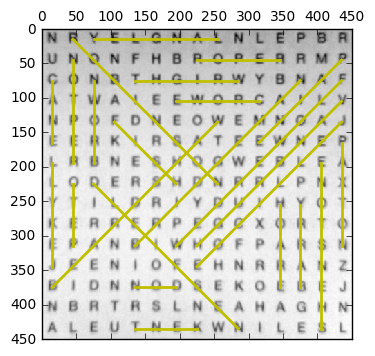

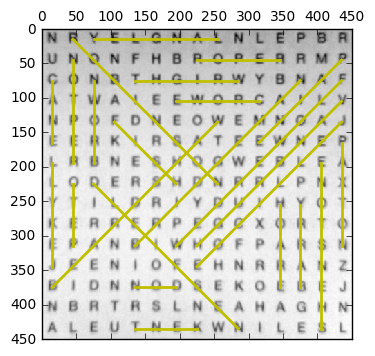

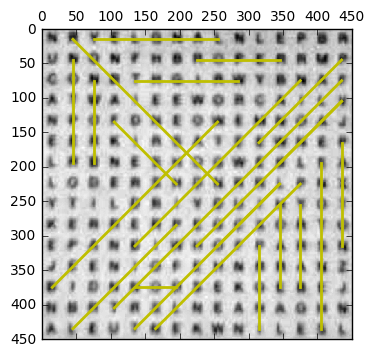

In [28]:
def index_label_list(grid_to_search,row_col_diag):
	#Combines rows, columns or diagonals of the indices grid with the respective labels in the classified matrix.
	return list(zip(row_col_diag,[grid_to_search[indx] for indx in row_col_diag]))

def trav_diag(grid_to_search,i_grid, l_searched, w_to_search, orientation="par"):
	"""	 i_grid: The grid of original indices.
		l_searched: The current lists searched.
	   w_to_search: word with characters converted to label numbers
	   orientation: "par" for parallel to leading diagonal, "per" for perpendicular to leading diagonal."""
	
	"""Diagonals perpendicular to the leading diagonal of i_grid are equivalent to diagonals parallel to the leading diagonal
	   of the reflection of i_grid."""
	indices_g=np.fliplr(i_grid) if orientation=="per" else i_grid
	journeys=0
	diag_n=0
	while journeys<2:
		par_diag=np.diagonal(indices_g,diag_n)
		new_tuples=search(index_label_list(grid_to_search,par_diag),w_to_search)
		if len(new_tuples)>0 and new_tuples[0]==(0,0,0): #Return immediately if exact match found.
			return new_tuples
		l_searched+=new_tuples
		if len(w_to_search)<len(par_diag):
			diag_n+=1-2*journeys #Increment the diagonal positively or negatively if it is the first journey or second journey, respectively.
		else:
			if len(w_to_search)==len(par_diag):
				diag_n=-1
			journeys+=1
	if orientation=="par": #Once parallel diagonals have been searched, search through perpendicular diagonals and add to the list.
		per_list=trav_diag(grid_to_search,i_grid,l_searched,w_to_search,"per")
		if len(per_list)>0 and per_list[0]==(0,0,0): #if per_list contains an exact match, return it without combining with l_searched
			return per_list
		l_searched+=per_list
	return l_searched

def draw_line(graph, start, end, side_length):
	"""This draws a line on a pyplot between two letters.
	   graph: the pyplot to draw on
	   start_letter: where the line begins, can be a coordinate or index.
	   end_letter: where the line ends, can be a coordinate or index."""
	
	if (isinstance(start, int)):
		draw_line(graph, [start % GRID_LENGTH,start//GRID_LENGTH], [end % GRID_LENGTH,end//GRID_LENGTH], side_length)
	else:
		xSxE=[start[0]*side_length+GRID_LENGTH,end[0]*side_length+GRID_LENGTH] #get starting x-coordinate, get ending x-coordinate.
		ySyE=[start[1]*side_length+GRID_LENGTH,end[1]*side_length+GRID_LENGTH] #get starting y-coordinate, get ending y-coordinate.
		plt.xlim(0, GRID_LENGTH*side_length)
		plt.ylim(GRID_LENGTH*side_length, 0)
		graph.plot(xSxE, ySyE, 'y-',linewidth=2) #Plot a yellow line on the graph]#

def wordsearch(testN, words_to_find, train_dat, train_lbl,reduced=False,pca_i=range(10)):
	print("Solving " + get_name(testN) + (" With Reduction" if reduced else ""))
	plt.matshow(testN, cmap=cm.gray)
	#Classification, Pre-processing, Dimensionality Reduction
	training_dat = reduce(train_dat,train_dat,10,pca_i) if reduced else train_dat
	preprocessed = get_characters(testN, True)
	classified_mat = classify(training_dat, train_lbl, reduce(preprocessed,train_dat,10,pca_i) if reduced else preprocessed)
	print(str(correctly_processed(classified_mat,TEST_LABELS,False))
	  + " letters were correctly labelled which is about "
	  + str(correctly_processed(classified_mat,TEST_LABELS,True)) + "% of the letters.")
	#Give every element a unique number because the functions to be used such as diagonal do not preserve indices
	indices_grid=np.reshape(range(classified_mat.shape[0]), (GRID_LENGTH,GRID_LENGTH))
	#Select a word to find
	lines=[]
	for w_string in words_to_find:
		w=[ord(ch)-96 for ch in list(w_string)]
		#Perform the search
		print("Searching for " + w_string)
		lists_searched = []
		for r in range(0,GRID_LENGTH): #Search row by row
			lists_searched+=search(index_label_list(classified_mat,indices_grid[r]),w)
		if lists_searched[0]!=(0,0,0): #Search column by column if an exact match still 
			for c in range(0,GRID_LENGTH):
				lists_searched+=search(index_label_list(classified_mat,indices_grid[:,c]),w)
		if lists_searched[0]!=(0,0,0): #earch all diagonals that are longer than or just as long as the word if still no exact match
			lists_searched=trav_diag(classified_mat,indices_grid,lists_searched,w)
		if lists_searched[0]==(0,0,0): #If an exact match was found, the likeliest is the element at index [1]
			likeliest=lists_searched[1]
		else: #Otherwise, the likeliest is the tuple that has the biggest third element
			likeliest=sorted(lists_searched,key=lambda trituple: trituple[2])[len(lists_searched)-1]
		likeliest_tuple=likeliest[:2]
		lines+=[likeliest_tuple]
		#Display the result
		print("Line from index " + str(likeliest_tuple[0]) + " to index " + str(likeliest_tuple[1]))
		draw_line(plt,int(likeliest_tuple[0]), int(likeliest_tuple[1]), BLOCK_LENGTH)
	print("Solved")
	print(str(sum([t[0] and t[1] for t in (np.array(CORRECT_LINES)==(np.array(lines)))])) + " out of " + str(len(words)) + " found correctly.")
	plt.gcf().savefig(get_name(testN) + ("_reduced" if reduced else ""), dpi=100)

#Trial 1
wordsearch(test1, words, train_data, train_labels)
#Trial 2
PCA_I=[1, 2, 3, 5, 6, 7, 8, 9, 10, 11]
wordsearch(test1, words, train_data, train_labels,True,PCA_I)
#Trial 3
wordsearch(test2, words, train_data, train_labels,True,PCA_I)

In [ ]:
best_score=10
def findsubsets(S,m):
    return set(itertools.combinations(S, m))

feature_set=list(findsubsets(range(15),10))

for feature_subset in feature_set:
    ws_output=wordsearch(test2, words, train_data, train_labels,True,feature_subset)
    print(feature_subset)
    if (ws_output[1]>=best_score):
        best_score=ws_output[1]
        print(ws_output)
print("done")

(0, 1, 3, 4, 5, 7, 8, 9, 12, 13)
(0, 2, 3, 4, 5, 6, 8, 9, 10, 13)
(1, 2, 3, 4, 5, 7, 9, 11, 13, 14)
(91, 13)
(2, 3, 4, 6, 8, 9, 10, 12, 13, 14)
(0, 1, 2, 4, 6, 9, 10, 12, 13, 14)
(0, 1, 3, 4, 5, 7, 8, 9, 10, 12)
(0, 1, 2, 3, 4, 5, 6, 8, 9, 11)
(1, 2, 4, 6, 7, 9, 11, 12, 13, 14)
(0, 2, 3, 4, 5, 6, 9, 10, 13, 14)
(0, 1, 2, 3, 4, 5, 6, 7, 9, 13)
(0, 2, 3, 4, 5, 7, 8, 10, 11, 14)
(0, 2, 3, 4, 5, 6, 7, 10, 11, 13)
(0, 3, 5, 6, 7, 9, 11, 12, 13, 14)
(0, 1, 3, 5, 7, 8, 10, 12, 13, 14)
(0, 1, 2, 4, 5, 7, 9, 12, 13, 14)
(1, 3, 5, 6, 8, 9, 10, 11, 13, 14)
(81, 13)
(0, 2, 3, 5, 6, 8, 10, 12, 13, 14)
(1, 2, 4, 5, 7, 9, 11, 12, 13, 14)
(0, 1, 2, 6, 9, 10, 11, 12, 13, 14)
(0, 1, 3, 5, 7, 8, 9, 12, 13, 14)
(2, 3, 4, 6, 7, 8, 9, 10, 11, 13)
(0, 2, 3, 5, 6, 8, 9, 12, 13, 14)
(0, 1, 2, 5, 6, 7, 9, 11, 13, 14)
(0, 1, 2, 3, 6, 7, 8, 10, 12, 14)
(1, 3, 5, 7, 8, 9, 10, 11, 13, 14)
(0, 2, 5, 6, 8, 9, 10, 11, 13, 14)
(1, 2, 3, 5, 7, 8, 9, 10, 12, 13)
(1, 2, 3, 6, 7, 8, 9, 10, 11, 14)
(0, 1, 4, 5, 6, 9, 10, 11